In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

In [32]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [33]:
df = df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis =1)

In [34]:
# Create a copy of the dataframe
df1 = df.copy()

# Define categorical columns for One-Hot Encoding
categoricalColumns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding
encodedResults = encoder.fit_transform(df1[categoricalColumns])

# Convert encoded data to DataFrame
encodedDataFrame = pd.DataFrame(encodedResults, columns=encoder.get_feature_names_out(categoricalColumns))

# Concatenating encoded DataFrame with original DataFrame df1
df1 = pd.concat([df1.drop(columns=categoricalColumns), encodedDataFrame], axis=1)




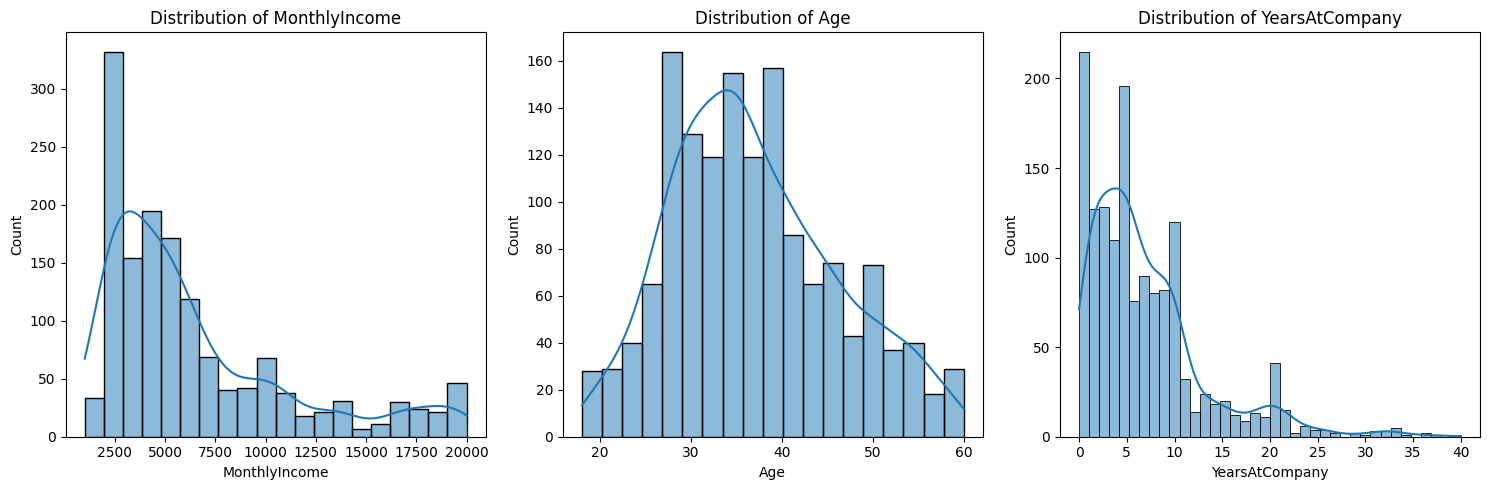

In [35]:
# 2. visulizing the column to identify data distribution
columns_to_visualize = ['MonthlyIncome', 'Age', 'YearsAtCompany']

# 3. Histograms
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [36]:
# scaling monthly income and Years at Company using MinMaxScaler, this will scale the data between 0 and 1 maintaining the 
# original data distribution
minMaxScaler = MinMaxScaler()

# Apply scaling
df1['MonthlyIncome'] = minMaxScaler.fit_transform(df1[['MonthlyIncome']])
df1['YearsAtCompany'] = minMaxScaler.fit_transform(df1[['YearsAtCompany']])
df1['Age'] = minMaxScaler.fit_transform(df1[['Age']])


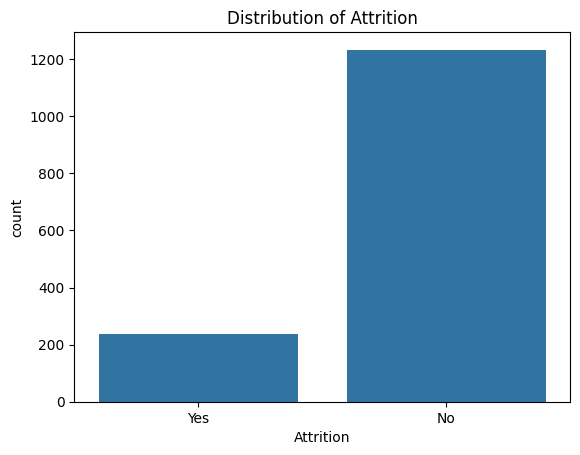

In [37]:
# using box plot to visualize the attrition (yes, no) count
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

In [38]:
categorical_factors = ['JobSatisfaction', 'WorkLifeBalance', 'OverTime']
for factor in categorical_factors:
    contingency_table = pd.crosstab(df[factor], df['Attrition'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nChi-square Test for {factor} vs Attrition:\nChi2 = {chi2:.2f}, p-value = {p:.4f}")

# from above all the factor have significant association with the attrition, from all those the overtime has a strong relationship
# with attrition, p < 0.05 inidcates to reject null-hypothesis


Chi-square Test for JobSatisfaction vs Attrition:
Chi2 = 17.51, p-value = 0.0006

Chi-square Test for WorkLifeBalance vs Attrition:
Chi2 = 16.33, p-value = 0.0010

Chi-square Test for OverTime vs Attrition:
Chi2 = 87.56, p-value = 0.0000


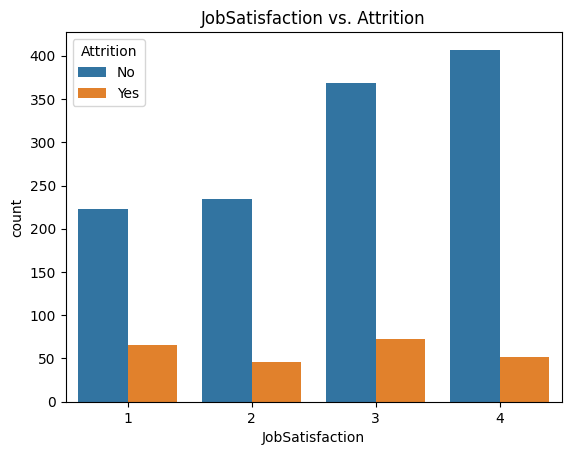

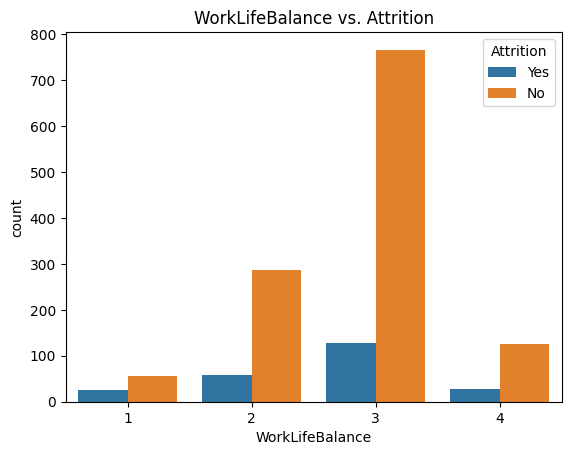

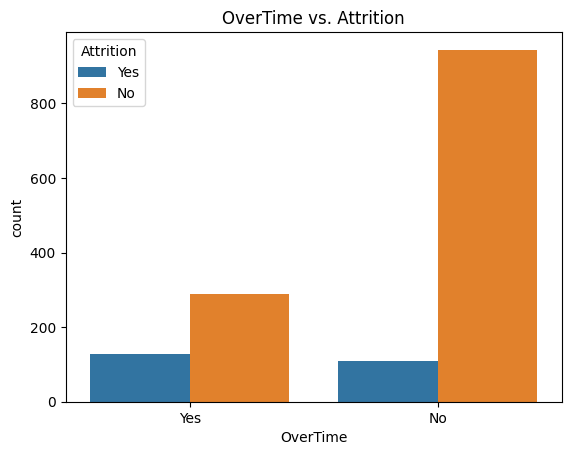

In [39]:
# visualizing the relation of job satisfaction, WorkLifeBalance, and Overtime with Attrtion
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('JobSatisfaction vs. Attrition')
plt.show()
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('WorkLifeBalance vs. Attrition')
plt.show()
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs. Attrition')
plt.show()

#Employees with higher job satisfaction (4) seem to have slightly lower attrition compared to those with lower job satisfaction.
# Higher the job stisfaction, lower the attrition
# lower worklife balance higher the attrition its attrition
# higher the work life balance, lower the attrtion, i am right?
# overtime may be a major factor in employee attrition, employees who don't work on overtime, have lower attrition rate

Correlation of numerical variables with Attrition:
 Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
ExperienceLevelCatagory_New Hire     0.211165
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
ExperienceLevelCatagory_Mid-Level    0.028764
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike           

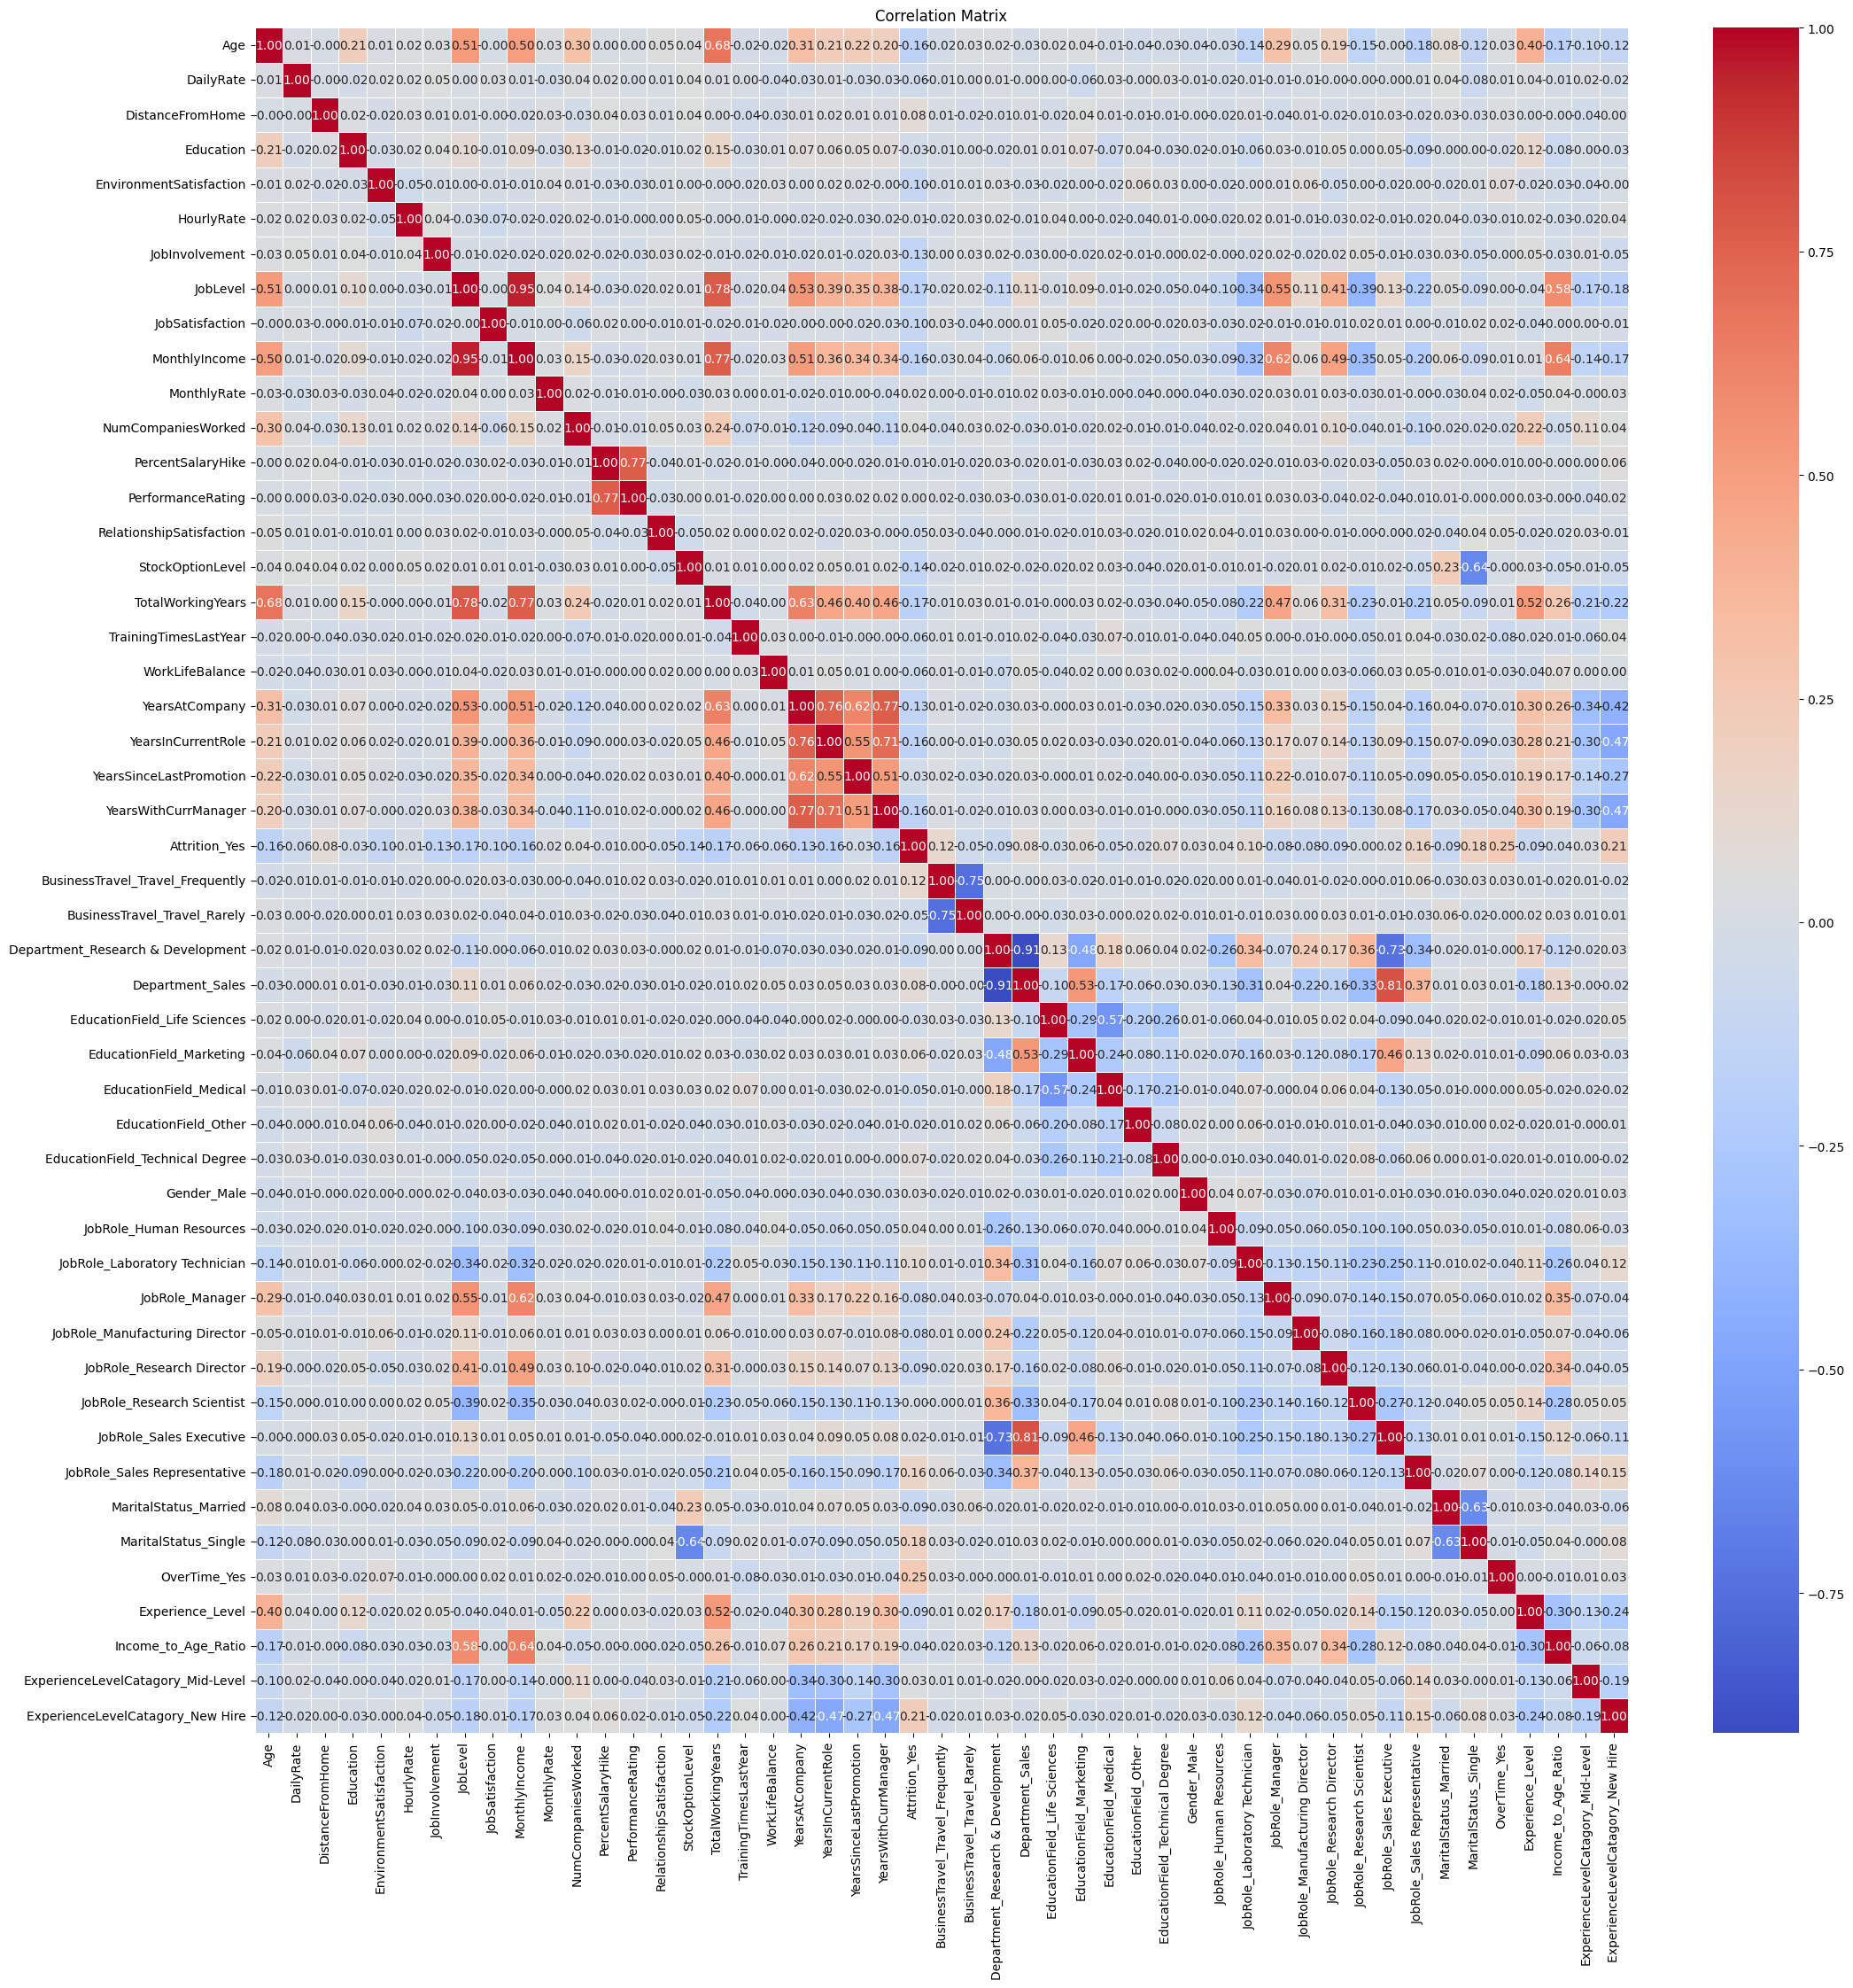

In [182]:
correlation_matrix = df1.corr()

# Extract correlation values for Attrition_Yes
attrition_correlation = correlation_matrix["Attrition_Yes"].sort_values(ascending=False)

# Display correlation values
print("Correlation of numerical variables with Attrition:\n", attrition_correlation)

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# below result show the relation of the other factors with the attrtion i.e overtime has the positive correlation (direct relation with attrittion)
# while total working year has negative impaact with attrition (inverse relation)

In [40]:
# Feature Engineering (making new feature the existing one, to enhnace model efficiency and reduce computation power)
df1['Experience_Level'] = df1['TotalWorkingYears'] / df1['JobLevel']
df1['Experience_Level']

0       4.0
1       5.0
2       7.0
3       8.0
4       6.0
       ... 
1465    8.5
1466    3.0
1467    3.0
1468    8.5
1469    3.0
Name: Experience_Level, Length: 1470, dtype: float64

In [41]:
df1['Income_to_Age_Ratio'] = (df1['MonthlyIncome'] / df1['Age']+1e-9)
df1['Income_to_Age_Ratio'] 

0       0.479264
1       0.294012
2       0.125834
3       0.280147
4       0.604283
          ...   
1465    0.191926
1466    0.945972
1467    1.261401
1468    0.312562
1469    0.469293
Name: Income_to_Age_Ratio, Length: 1470, dtype: float64

In [42]:
bins = [0, 2, 4, float('inf')]  # 0-3: New Hire, 4-10: Mid-Level, 11+: Experienced
labels = ['New Hire', 'Mid-Level', 'Experienced']

# Apply binning with 'right=False' to correctly categorize values
df1['ExperienceLevelCatagory'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=False)

df1['ExperienceLevelCatagory']

0       Experienced
1       Experienced
2          New Hire
3       Experienced
4         Mid-Level
           ...     
1465    Experienced
1466    Experienced
1467    Experienced
1468    Experienced
1469    Experienced
Name: ExperienceLevelCatagory, Length: 1470, dtype: category
Categories (3, object): ['New Hire' < 'Mid-Level' < 'Experienced']

In [43]:
# Check if there are any NaN values after binning

encoder = OneHotEncoder(sparse_output=False, drop='first') # sparse_output=False for dense array

# Transform the column
encoded_1 = encoder.fit_transform(df1[['ExperienceLevelCatagory']])

# Get encoded column names
encoded_columns = encoder.get_feature_names_out(['ExperienceLevelCatagory'])

# Convert to DataFrame with the same index as df1
encodedDataFrame = pd.DataFrame(encoded_1, columns=encoded_columns, index=df1.index)

# Concatenate with original DataFrame (dropping the original column)
df1 = pd.concat([df1.drop(columns=['ExperienceLevelCatagory']), encodedDataFrame], axis=1)


df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Experience_Level,Income_to_Age_Ratio,ExperienceLevelCatagory_Mid-Level,ExperienceLevelCatagory_New Hire
0,0.547619,1102,1,2,2,94,3,2,4,0.262454,...,0.0,1.0,0.0,0.0,1.0,1.0,4.0,0.479264,0.0,0.0
1,0.738095,279,8,1,3,61,2,2,2,0.217009,...,1.0,0.0,0.0,1.0,0.0,0.0,5.0,0.294012,0.0,0.0
2,0.452381,1373,2,2,4,92,2,1,3,0.056925,...,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.125834,0.0,1.0
3,0.357143,1392,3,4,4,56,3,1,3,0.100053,...,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.280147,0.0,0.0
4,0.214286,591,2,1,1,40,3,1,2,0.129489,...,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.604283,1.0,0.0


In [44]:
df1.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition_Yes                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rar

In [45]:
df2 = df1.drop( ['YearsAtCompany','MonthlyIncome','Age','TotalWorkingYears','JobLevel'],axis=1)

In [46]:
df2.isnull().sum()


DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition_Yes                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical   

In [77]:

X = df2.drop(['Attrition_Yes'],axis = 1)
y = df2['Attrition_Yes']
# # Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.replace([np.inf, -np.inf], inplace=True)
X_test.replace([np.inf, -np.inf], inplace=True)

# # Apply ADASYN
adasyn = ADASYN(sampling_strategy=0.84, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
print("Class distribution after ADASYN:", Counter(y_train_resampled))


Class distribution after ADASYN: Counter({0.0: 986, 1.0: 785})


In [78]:
# implementing LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

logistic Regression Accuracy: 0.7993197278911565
[[209  38]
 [ 21  26]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       247
         1.0       0.41      0.55      0.47        47

    accuracy                           0.80       294
   macro avg       0.66      0.70      0.67       294
weighted avg       0.83      0.80      0.81       294



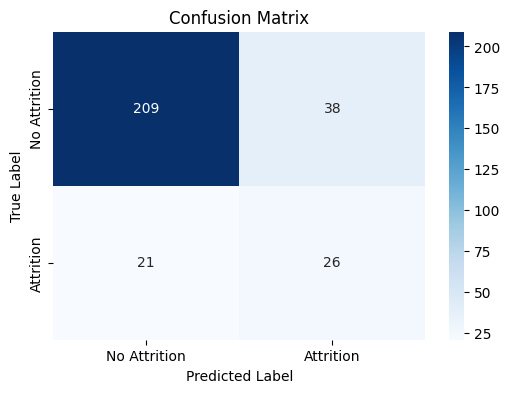

In [79]:
# logistic regression model evaluation
predictions = model.predict(X_test)
print("logistic Regression Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [80]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier Accuracy: 0.8401360544217688
[[235  12]
 [ 35  12]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       247
         1.0       0.50      0.26      0.34        47

    accuracy                           0.84       294
   macro avg       0.69      0.60      0.62       294
weighted avg       0.81      0.84      0.82       294



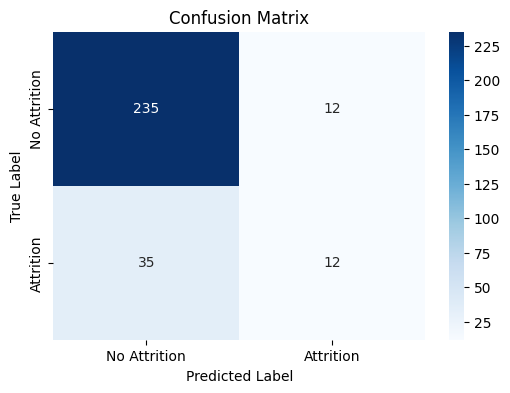

In [81]:
# evaluating the decission tree classifier
predictions = dt.predict(X_test)
print("DecisionTreeClassifier Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

conf_matrix =confusion_matrix(y_test, predictions)
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [82]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.8537414965986394
[[243   4]
 [ 39   8]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       247
         1.0       0.67      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.76      0.58      0.59       294
weighted avg       0.83      0.85      0.82       294



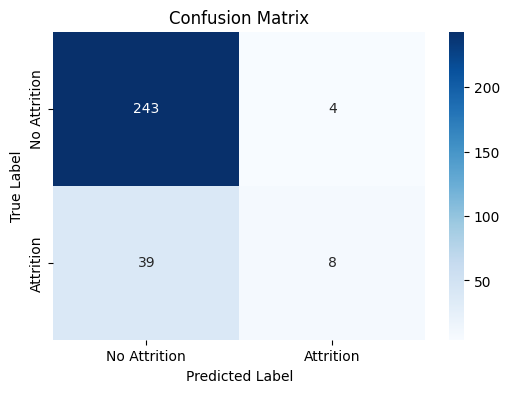

In [83]:
# evaluating random forest algorithm
predictions = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



Gradient Boosting Accuracy: 0.8673469387755102
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       247
         1.0       0.70      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.79      0.64      0.67       294
weighted avg       0.85      0.87      0.84       294

[[241   6]
 [ 33  14]]


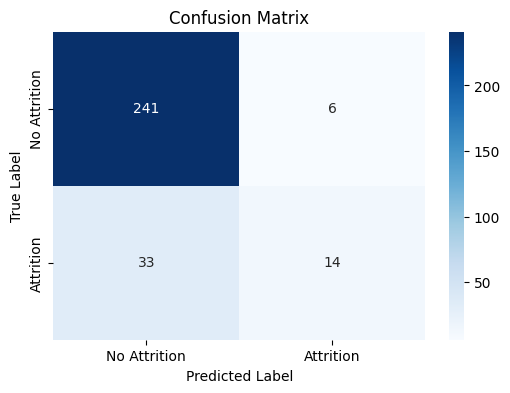

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_gb = gb.predict(X_test)

# Evaluate model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

conf_matrix = confusion_matrix(y_test, y_pred_gb)
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
##  --------------------------------- which model should be selected? ---------------------------------------------

In [ ]:
[[241   6]
 [ 33  14]]

In [ ]:
## most highest accuracy --------------------------------
        # ---------------- GradientBoostingClassifier ----------> 87 %

                                # precision for class 1 ---> 	0.70   recall for class 1 -----> 0.30  F1 Score ----> 0.42
                                # macro avg F1 ---->  0.67   Weighted average F1 ----> 0.84

        # ---------------- RandomForestClassifier ------------------> 85 %

                                # precision for class 1 ---> 	67    recall for class -----> 0.17  F1 Score ----> 0.27
                                # macro avg F1 ---->  0.59    Weighted average F1 ----> 0.82

        # ---------------- logistic Regression ------------------> 80 %

                                # precision for class 1 ---> 	41    recall for class -----> 0.55  F1 Score ----> 0.47
                                # macro avg F1 ---->  0.67    Weighted average F1 ----> 0.81

        

# Better Model ---->  GradientBoostingClassifier

# Analysis Results:
   # Gradient Boosting (88.08%) > Random Forest (86.28%)  
   # A slight improvement, indicating better overall classification.  
   # Gradient Boosting detects more Class 1 instances (Recall = 0.30 vs. 0.17 in Random Forest).  
   # Gradient Boosting has a higher F1score (0.42 vs. 0.27), meaning a better balance between precision and recall.  
   # Gradient Boosting has a higher Macro F1score (0.67 vs. 0.59), which balances both classes better.  
   # Weighted F1score is also higher for Gradient Boosting (0.84 vs. 0.82), confirming better overall prediction quality.  
   # Gradient Boosting correctly classifies more Class 1 instances (TP = 14 vs. 8 in Random Forest).  
   # Random Forest misclassifies more Class 1 instances as Class 0 (FN = 39 vs. 33 in Gradient Boosting). 
   # logistic regression is not selected here due to overall less accuracy and precission, as precession can be more important than reacall in some business cases
   
# ------------------------ Gradient Boosting is better for overall performance, especially for detecting Class 1 cases.  ----------------- 



In [ ]:
# most influential factors 
 # the factors that impact attrition (employee are likely to leave) are Overtime, Experience, MartialStatus, JobRole, distancefromhome, EducationalField
 # the factors that impact the attrtion negatively (inverse relation) are YearsWithCurrManager, Age, MonthlyIncome, YearsInCurrentRole,JobLevel,TotalWorkingYears